In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('../final_stats/final_season_sent_game_last_1.csv', index_col=[0])
df = df.reset_index(drop=True)
df

,Week,Day,Date,home,away,home_score,away_score,away_positive96,away_positive24,away_neutral96,...,away_off_pass_att_last_1,away_off_pass_tds_last_1,away_off_pass_ints_last_1,away_def_sacks_last_1,away_def_sack_yds_last_1,away_tm_penalty_last_1,away_tm_penalty_yds_last_1,away_opp_penalty_last_1,away_opp_penalty_yds_last_1,away_spread
0,12,Sun,2022-11-27,titans,bengals,16.0,20.0,885.0,340.0,1098.0,...,39.0,4.0,2.0,2.0,16.0,6.0,44.0,8.0,70.0,-1.5
1,12,Sun,2022-11-27,browns,buccaneers,23.0,17.0,469.0,186.0,701.0,...,30.0,2.0,2.0,3.0,31.0,4.0,40.0,6.0,46.0,-3.0
2,12,Sun,2022-11-27,dolphins,texans,30.0,15.0,390.0,129.0,753.0,...,33.0,0.0,2.0,0.0,0.0,2.0,15.0,5.0,36.0,-14.0
3,12,Sun,2022-11-27,commanders,falcons,19.0,13.0,239.0,80.0,600.0,...,20.0,1.0,0.0,4.0,25.0,2.0,13.0,7.0,56.0,-4.0
4,12,Sun,2022-11-27,panthers,broncos,23.0,10.0,671.0,197.0,804.0,...,31.0,0.0,0.0,1.0,9.0,5.0,45.0,9.0,98.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,19,Sat,2023-01-14,jaguars,chargers,31.0,30.0,1845.0,973.0,1633.0,...,44.0,3.0,0.0,2.0,17.0,5.0,34.0,3.0,36.0,-2.5
102,19,Sun,2023-01-15,bills,dolphins,34.0,31.0,4213.0,2007.0,2233.0,...,31.0,0.0,0.0,0.0,0.0,5.0,47.0,6.0,54.0,-13.5
103,19,Sun,2023-01-15,vikings,giants,24.0,31.0,3100.0,1504.0,2097.0,...,40.0,1.0,0.0,3.0,22.0,8.0,66.0,4.0,30.0,-3.0
104,19,Sun,2023-01-15,bengals,ravens,24.0,17.0,283.0,86.0,793.0,...,44.0,0.0,2.0,2.0,13.0,5.0,22.0,3.0,35.0,-8.5


Drop unused columns
### No sentiment model

In [3]:
no_sent_cols_to_remove = [
# always remove
'Week',
'Date',
'home_spread',
'away_spread_last_1',
'home_spread_last_1',
# sentiment to remove
'away_positive96',
'away_positive24',
'away_neutral96',
'away_neutral24',
'away_negative96',
'away_negative24',
'away_sentiment_96h',
'away_sentiment_24h',
'away_swing',

'home_positive96',
'home_positive24',
'home_neutral96',
'home_neutral24',
'home_negative96',
'home_negative24',
'home_sentiment_96h',
'home_sentiment_24h', 
'home_swing',
]

In [22]:
df_no_sent = df.drop(no_sent_cols_to_remove, axis=1)
df_no_sent['away_spread']

0      -1.5
1      -3.0
2     -14.0
3      -4.0
4      -1.0
       ... 
101    -2.5
102   -13.5
103    -3.0
104    -8.5
105    -2.5
Name: away_spread, Length: 106, dtype: float64

## one-hot encode teams

In [17]:
def one_hot_encode_teams_days(df):
    df_1hot_home = pd.get_dummies(df.home, prefix='home', drop_first=True)
    df_1hot_away = pd.get_dummies(df.away, prefix='away', drop_first=True)
    df_1hot_days = pd.get_dummies(df.Day, prefix='day', drop_first=True)
    return pd.concat([df_no_sent, df_1hot_home, df_1hot_away,df_1hot_days], axis=1).drop(['home','away', 'Day'], axis=1)

df_1hot = one_hot_encode_teams_days(df_no_sent)
# df_1hot.head()
df_1hot

,home_score,away_score,home_score_team_last_1,home_score_opp_last_1,home_pass_cmp_off_last_1,home_pass_att_off_last_1,home_pass_yds_off_last_1,home_pass_tds_off_last_1,home_ints_off_last_1,home_sacks_off_last_1,...,away_ravens,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu
0,16.0,20.0,27.0,17.0,24.0,29.0,320.0,3.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,23.0,17.0,23.0,31.0,28.0,41.0,316.0,3.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,30.0,15.0,39.0,17.0,26.0,33.0,296.0,3.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
3,19.0,13.0,23.0,10.0,15.0,27.0,191.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,23.0,10.0,3.0,13.0,21.0,33.0,169.0,0.0,2.0,4.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,31.0,30.0,20.0,16.0,20.0,32.0,203.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
102,34.0,31.0,35.0,23.0,19.0,31.0,237.0,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
103,24.0,31.0,29.0,13.0,28.0,33.0,341.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
104,24.0,17.0,27.0,16.0,25.0,42.0,202.0,1.0,0.0,2.0,...,1,0,0,0,0,0,0,0,1,0


In [21]:
def move_away_spread_to_start(df):
    spread_col = df.pop('away_spread')
    df.insert(0, 'away_spread', spread_col)
    return df

df_1hot1 = move_away_spread_to_start(df_1hot)
df_1hot1['away_spread'].max()


-1.0

In [13]:
def convert_actual_spread_to_winner_wts(df):
    df = df.copy()
    df['away_winner_wts'] = df['away_score'] + df['away_spread'] > df['home_score']
    col_to_move = df.pop('away_winner_wts')
    df.insert(0, 'away_winner_wts', col_to_move)
    # df = df.drop(['home_score','away_score'], axis=1)
    return df

convert_actual_spread_to_winner_wts(df_1hot1)

,away_winner_wts,away_spread,home_score,away_score,home_score_team_last_1,home_score_opp_last_1,home_pass_cmp_off_last_1,home_pass_att_off_last_1,home_pass_yds_off_last_1,home_pass_tds_off_last_1,...,away_ravens,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu
0,True,-1.5,16.0,20.0,27.0,17.0,24.0,29.0,320.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,False,-3.0,23.0,17.0,23.0,31.0,28.0,41.0,316.0,3.0,...,0,0,0,0,0,0,0,0,1,0
2,False,-14.0,30.0,15.0,39.0,17.0,26.0,33.0,296.0,3.0,...,0,0,0,0,1,0,0,0,1,0
3,False,-4.0,19.0,13.0,23.0,10.0,15.0,27.0,191.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,False,-1.0,23.0,10.0,3.0,13.0,21.0,33.0,169.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
def combine_score_to_spread_result(df):
    df = df.copy()
    df['away_actual_spread'] = df['home_score'] - df['away_score']
    col_to_move = df.pop('away_actual_spread')
    df.insert(0, 'away_actual_spread', col_to_move)
    df = df.drop(['home_score','away_score'], axis=1)
    return df

combine_score_to_spread_result(df_1hot1)

,away_actual_spread,away_spread,home_score_team_last_1,home_score_opp_last_1,home_pass_cmp_off_last_1,home_pass_att_off_last_1,home_pass_yds_off_last_1,home_pass_tds_off_last_1,home_ints_off_last_1,home_sacks_off_last_1,...,away_ravens,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu
0,-4.0,-1.5,27.0,17.0,24.0,29.0,320.0,3.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,6.0,-3.0,23.0,31.0,28.0,41.0,316.0,3.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,15.0,-14.0,39.0,17.0,26.0,33.0,296.0,3.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
3,6.0,-4.0,23.0,10.0,15.0,27.0,191.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,13.0,-1.0,3.0,13.0,21.0,33.0,169.0,0.0,2.0,4.0,...,0,0,0,0,0,0,0,0,1,0


### Need to have a binary target
Winner or loser with the spread for home or away team

### Combine Previous Preprocessing

In [8]:
def preprocess_1(filepath, cols_to_remove):
    # read csvw
    df = pd.read_csv(filepath, index_col=[0])
    df = df.reset_index(drop=True)
    # drop correct columns
    df = df.drop(cols_to_remove, axis=1)
    # one-hot encode categorical vars
    df = one_hot_encode_teams_days(df)
    # move away_spread to first col
    df = move_away_spread_to_start(df)
    # calc actual spread
    df = combine_score_to_spread_result(df)
    return df

filepath = '../final_stats/final_season_sent_game_last_1.csv'    

df1_no_sent = preprocess_1(filepath, no_sent_cols_to_remove)
    

In [9]:
df1_no_sent

,away_actual_spread,away_spread,home_score_team_last_1,home_score_opp_last_1,home_pass_cmp_off_last_1,home_pass_att_off_last_1,home_pass_yds_off_last_1,home_pass_tds_off_last_1,home_ints_off_last_1,home_sacks_off_last_1,...,away_ravens,away_saints,away_seahawks,away_steelers,away_texans,away_titans,away_vikings,day_Sat,day_Sun,day_Thu
0,-4.0,-1.5,27.0,17.0,24.0,29.0,320.0,3.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,6.0,-3.0,23.0,31.0,28.0,41.0,316.0,3.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,15.0,-14.0,39.0,17.0,26.0,33.0,296.0,3.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
3,6.0,-4.0,23.0,10.0,15.0,27.0,191.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,13.0,-1.0,3.0,13.0,21.0,33.0,169.0,0.0,2.0,4.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1.0,-2.5,20.0,16.0,20.0,32.0,203.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
102,3.0,-13.5,35.0,23.0,19.0,31.0,237.0,3.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
103,-7.0,-3.0,29.0,13.0,28.0,33.0,341.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
104,7.0,-8.5,27.0,16.0,25.0,42.0,202.0,1.0,0.0,2.0,...,1,0,0,0,0,0,0,0,1,0


## Predict the away actual spread

In [68]:
def split_target(df, target_col='away_actual_spread'):
    df = df.copy()
    target = df.pop(target_col)
    return df, target

In [69]:
data,target = split_target(df1_no_sent)

In [73]:
target.head()

0    -4.0
1     6.0
2    15.0
3     6.0
4    13.0
Name: away_actual_spread, dtype: float64

## Normailze all columns


In [75]:
from sklearn.preprocessing import MinMaxScaler

def normalize_df(df):
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    data, target = split_target(df)
    return data, target

data,target = normalize_df(df1_no_sent)


In [76]:
import tensorflow as tf

In [77]:
# normalizer = tf.keras.layers.Normalization(axis=-1)

def get_basic_model():
    model = tf.keras.Sequential([
        # normalizer,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='rmsprop',
        loss='mse',
        metrics=['mae'])
    
    return model
    

In [79]:
model = get_basic_model()
history = model.fit(data, target, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 [==============================] - 1s 112ms/step - loss: 0.1385 - mae: 0.3021 - val_loss: 0.0687 - val_mae: 0.2060
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0648 - mae: 0.2163 - val_loss: 0.0412 - val_mae: 0.1778
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0482 - mae: 0.1808 - val_loss: 0.0408 - val_mae: 0.1825
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0391 - mae: 0.1633 - val_loss: 0.0410 - val_mae: 0.1638
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0317 - mae: 0.1464 - val_loss: 0.0365 - val_mae: 0.1593
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.0270 - mae: 0.1363 - val_loss: 0.0355 - val_mae: 0.1669
Epoch 7/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0259 - mae: 0.1303 - val_loss: 0.0537 - val_mae: 0.2040
Epoch 8/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0369 - mae: 0.1574 - va

In [81]:
history.history

{'loss': [0.13851602375507355,
  0.06484276801347733,
  0.04815354943275452,
  0.03908824548125267,
  0.031660210341215134,
  0.026986269280314445,
  0.025856750085949898,
  0.0369236022233963,
  0.018410656601190567,
  0.015069333836436272,
  0.011219506151974201,
  0.009277302771806717,
  0.010036650113761425,
  0.02010379172861576,
  0.013837047852575779,
  0.005815565586090088,
  0.004944709595292807,
  0.013603870756924152,
  0.01109208445996046,
  0.005471563898026943,
  0.003920476883649826,
  0.004038970917463303,
  0.016130510717630386,
  0.010489163920283318,
  0.0019821920432150364,
  0.0010260327253490686,
  0.0007790419040247798,
  0.0029565212316811085,
  0.025671087205410004,
  0.002653870265930891,
  0.0010320482542738318,
  0.000885496789123863,
  0.0024035160895437002,
  0.00907056126743555,
  0.009115515276789665,
  0.003226752392947674,
  0.0023428890854120255,
  0.002781097311526537,
  0.00622811121866107,
  0.004083495121449232,
  0.0033880998380482197,
  0.005116

In [84]:
import matplotlib.pyplot as plt

def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_mae(history):
    plt.clf()

    acc = history.history['mae']
    val_acc = history.history['val_mae']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training MAE')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation MAE')
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    plt.show()

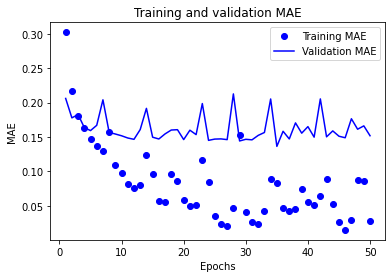

In [85]:
plot_train_val_mae(history)